In [38]:
import pandas as pd
df = pd.read_excel('dataset.xls')


对数据分析时，针对不同的车类计算异常的百分比，按照百分比来初步统计。
对于数值型数据，按照不同的标签，画出plot图，来统计变换范围。

In [39]:
type_dummies = pd.get_dummies(df[u'销售类型'],prefix= 'type')
model_dummies = pd.get_dummies(df[u'销售模式'],prefix= 'model')
result_dummies = pd.get_dummies(df[u'输出'],prefix = 'result')
df = pd.concat([df,type_dummies,model_dummies,result_dummies],axis=1)
#df['输出']=df['输出'].replace('正常',1)
#df['输出']=df['输出'].replace('异常',0)
#for m,n in enumerate(set(df['销售类型'])):
#    df['销售类型'] = df['销售类型'].replace(n, m+1)
#for m,n in enumerate(set(df['销售模式'])):
#    df['销售模式'] = df['销售模式'].replace(n, m+1)

In [40]:
print(df)

     纳税人编号   销售类型        销售模式  汽车销售平均毛利    维修毛利  企业维修收入占销售收入比重   增值税税负  \
0        1   国产轿车         4S店    0.0635  0.3241         0.0879  0.0084   
1        2   国产轿车         4S店    0.0520  0.2577         0.1394  0.0298   
2        3   国产轿车         4S店    0.0173  0.1965         0.1025  0.0067   
3        4   国产轿车       一级代理商    0.0501  0.0000         0.0000  0.0000   
4        5   进口轿车         4S店    0.0564  0.0034         0.0066  0.0017   
5        6   进口轿车         4S店    0.0484  0.6814         0.0064  0.0031   
6        7   进口轿车         4S店    0.0520  0.3868         0.0348  0.0054   
7        8    大客车       一级代理商   -1.0646  0.0000         0.0000  0.0770   
8        9   国产轿车  二级及二级以下代理商    0.0341 -1.2062         0.0025  0.0070   
9       10   国产轿车  二级及二级以下代理商    0.0312  0.2364         0.0406  0.0081   
10      11   国产轿车         4S店    0.0489  0.4763         0.0851  0.0000   
11      12   国产轿车         4S店    0.0638  0.4570         0.1521  0.0175   
12      13   国产轿车         4S店    0.025

In [41]:
df.drop([u'销售类型',u'销售模式',u'输出'],axis=1,inplace = True)
#正常列去除，异常列作为结果 1表示异常 0表示正常
df.drop([u'result_正常'],axis=1,inplace=True)
df.rename(columns={u'result_异常':'result'},inplace = True)


In [42]:
print(df)

     纳税人编号  汽车销售平均毛利    维修毛利  企业维修收入占销售收入比重   增值税税负    存货周转率  成本费用利润率  整体理论税负  \
0        1    0.0635  0.3241         0.0879  0.0084   8.5241   0.0018  0.0166   
1        2    0.0520  0.2577         0.1394  0.0298   5.2782  -0.0013  0.0032   
2        3    0.0173  0.1965         0.1025  0.0067  19.8356   0.0014  0.0080   
3        4    0.0501  0.0000         0.0000  0.0000   1.0673  -0.3596 -0.1673   
4        5    0.0564  0.0034         0.0066  0.0017  12.8470  -0.0014  0.0123   
5        6    0.0484  0.6814         0.0064  0.0031  15.2445   0.0012  0.0063   
6        7    0.0520  0.3868         0.0348  0.0054  16.8715   0.0054  0.0103   
7        8   -1.0646  0.0000         0.0000  0.0770   2.0000  -0.2905 -0.1810   
8        9    0.0341 -1.2062         0.0025  0.0070   9.6142  -0.1295  0.0413   
9       10    0.0312  0.2364         0.0406  0.0081  21.3944   0.0092  0.0112   
10      11    0.0489  0.4763         0.0851  0.0000  10.9974   0.2156  0.0136   
11      12    0.0638  0.4570

In [43]:
data=df.values
from random import shuffle
shuffle(data)
data_train=data[:int(len(data)*0.8),:]
data_test=data[int(len(data)*0.8):,:]

In [44]:
%matplotlib inline

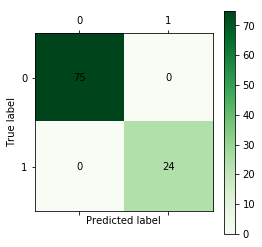

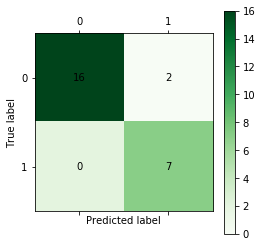

[0.         0.05423611 0.15523026 0.         0.         0.14788889
 0.         0.64264474 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ] Index(['纳税人编号', '汽车销售平均毛利', '维修毛利', '企业维修收入占销售收入比重', '增值税税负', '存货周转率',
       '成本费用利润率', '整体理论税负', '整体税负控制数', '办牌率', '单台办牌手续费收入', '代办保险率', '保费返还率',
       'type_其它', 'type_卡车及轻卡', 'type_商用货车', 'type_国产轿车', 'type_大客车',
       'type_工程车', 'type_微型面包车', 'type_进口轿车', 'model_4S店', 'model_一级代理商',
       'model_二级及二级以下代理商', 'model_其它', 'model_多品牌经营店', 'result'],
      dtype='object')
76.000000%


In [89]:
#确定y值和特征值
y=data_train[:,-1]
x=data_train[:,1:-1]
from sklearn.tree import DecisionTreeClassifier #导入决策树模型


tree = DecisionTreeClassifier() #建立决策树模型
tree.fit(x, y) #训练

#保存模型
#from sklearn.externals import joblib
#joblib.dump(tree, 'C:/Python27/Lib/site-packages/xy/chapter6/thoughts_tree.pkl')

from cm_plot import * #导入混淆矩阵可视化函数
cm_plot(y, tree.predict(x)).show() #显示混淆矩阵可视化结果

cm_plot(data_test[:,-1],tree.predict(data_test[:,1:-1])).show()
print(tree.feature_importances_,df.columns)
print('%f%%'%(tree.score(data_test[:,:-2],data_test[:,-1])*100))

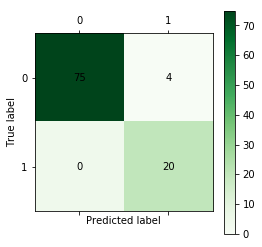

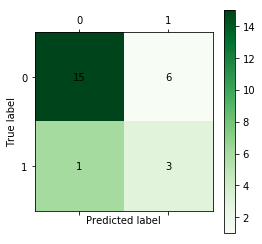

68.000000%
             columns                     coef
0              纳税人编号    [-0.2237772843310435]
1           汽车销售平均毛利    [-0.5507319889868789]
2               维修毛利    [-0.6556170112054793]
3      企业维修收入占销售收入比重   [-0.05791511067463849]
4              增值税税负     [0.0069495062011575]
5              存货周转率    [0.23112082574625348]
6            成本费用利润率  [-0.012246755096687652]
7             整体理论税负   [-0.06371110541826597]
8            整体税负控制数     [1.1250987009806337]
9                办牌率    [0.35513882163878635]
10         单台办牌手续费收入    [-0.6884098060281778]
11             代办保险率    [-0.5685037119645966]
12             保费返还率   [-0.03262091148923078]
13           type_其它    [-0.4296119707142529]
14        type_卡车及轻卡                    [0.0]
15         type_商用货车   [-0.11124004684293501]
16         type_国产轿车     [0.2959408902447127]
17          type_大客车     [0.6340716589105818]
18          type_工程车    [-0.2040150842314393]
19        type_微型面包车   [-0.15252453587744763]
20         type_进口轿车   

In [72]:
#逻辑回归
from sklearn import linear_model
#clf=linear_model.LogisticRegression(C=1.0,penalty='l1',tol=1e-6)
clf=linear_model.RidgeClassifier()
#此处的x,y与上文中决策树所用x,y相同
clf.fit(x,y)
#逻辑回归系数
xishu=pd.DataFrame({"columns":list(df.columns)[:-2], "coef":list(clf.coef_.T)})
#逻辑回归混淆矩阵
cm_plot(y,clf.predict(x)).show()
#对test数据进行预测
predictions=clf.predict(data_test[:,1:-1])
#test混淆矩阵
cm_plot(data_test[:,-1],predictions).show()
test_acc = clf.score(data_test[:,:-2],data_test[:,-1])*100
print('%f%%'%test_acc)
print(xishu)

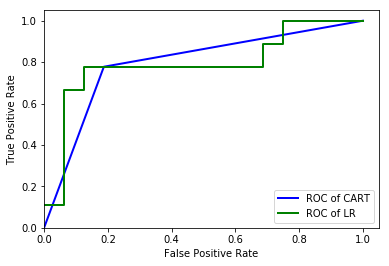

In [58]:
#两个分类方法的ROC曲线
from sklearn.metrics import roc_curve #导入ROC曲线函数
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
fpr, tpr, thresholds = roc_curve(data_test[:,-1], tree.predict_proba(data_test[:,1:-1])[:,1], pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(data_test[:,-1], clf.predict_proba(data_test[:,1:-1])[:,1], pos_label=1)
plt.plot(fpr, tpr, linewidth=2, label = 'ROC of CART', color = 'blue') #作出ROC曲线
plt.plot(fpr2, tpr2, linewidth=2, label = 'ROC of LR', color = 'green') #作出ROC曲线
plt.xlabel('False Positive Rate') #坐标轴标签
plt.ylabel('True Positive Rate') #坐标轴标签
plt.ylim(0,1.05) #边界范围
plt.xlim(0,1.05) #边界范围
plt.legend(loc=4) #图例
plt.show() #显示作图结果